In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

## Problem
This sheet is regarded as a numerical example of evaluating Energy dissipated in FPZ. The trilinear stress opening relation is given as:
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; 0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

However, the parameters used in the bilinear softening curve can be evaluated by using formula by Xu. Hence,
\begin{gather*}
\sigma_s (CTOD_c) = \frac{f_t(2 - f_t \frac{CTOD_c}{G_f})}{\alpha_f} \\
w_1 = CTOD_c \\
w_2 = \alpha_f \frac{G_f}{f_t} \\
\alpha_f = \lambda - \frac{d_{max}}{8} \\
\end{gather*}
where, $f_t$ represents tensile strength that can be obtained by either splitting tests or by the formula $f_t = 0.4983 \sqrt f_c$ . Here, $G_f$, $\lambda$, $\alpha_f$ represents Fracture Energy, calibration factor, deformation coefficient of concrete respectively. Furthermore, $d_{max}$ depicts maximum size of coarse aggregate and $CTOD_c$ is the critical crack tip opening displacement which can be determined by replacing $x = a_0$ in the equation for $w_x$.

In [2]:
lamda = sp.Symbol(r'\lambda', nonnegative = True)
G_F = sp.Symbol('G_F', nonnegative = True)
d_max = sp.Symbol('d_{max}', nonnegative = True)
CTOD_c = sp.Symbol('CTOD_{c}', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_{c}', nonnegative = True)
f_c = sp.Symbol('f_{c}', nonnegative = True)

### Calculating Stress for the trilinear stress opening curve


In [3]:
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol('w', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
w_0 = sp.Symbol('w_0', nonnegative = True)
a_c  = sp.Symbol('a_c', nonnegative = True)
a_0  = sp.Symbol('a_0', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
P_max = sp.Symbol('P_{max}', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)

### Critical Effective length
- Calculation of Critical Effective Length using:
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}
where, $C_{si}$ is the secant compliance at any crack propagation. The critical effective crack length $a_c$ can be derived by setting:
\begin{gather*}
C_{si}= \frac{CMOD_c}{P_{max}}
\end{gather*}

In [4]:
C_si = sp.Symbol('C_{si}', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_c', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
lamda = sp.Symbol(r'\lambda', nonnegative = True)
d_max = sp.Symbol('d_{max}', nonnegative = True)
G_Fo = sp.Symbol('G_{Fo}', nonnegative = True)
f_cmo = sp.Symbol('f_{cmo}', nonnegative = True)
#f_t = sp.Symbol('f_{t}', nonnegative = True)
#sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
C_si = CMOD_c / P_max

In [5]:
params = {P_max : 9720, #N
          D : 500, #mm
          H_0 : 3, #mm 
          B : 196, #mm
          E : 26720, #N/mm2 
          a_0 : 0.46, #mm
          #a : 493.49, #mm
          CMOD_c : 0.13663, #mm
          f_c : 29.56 , #N/mm2
          #f_t : 10, #N/mm2
          #sigma_s : 5, #N/mm2
          lamda : 10, 
          d_max : 10, #mm
          f_cmo : 10, #N/mm2
          G_Fo : 0.027, #Nmm/mm2
          pi : 3.14,
          S : 2000
         }

In [6]:
G_F = G_Fo * (f_c/ f_cmo)**0.7 #From RILEM
G_F_ = G_F.subs(params)
G_F_

In [7]:
C_si_ = C_si.subs(params)
C_si_

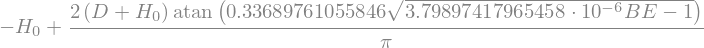

In [8]:
a_i = ((2/pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si_)/(32.6)-0.1135))) - H_0
a_i

In [9]:
a_c = a_i.subs(params)
a_c

\begin{gather*}
w_x = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}


In [10]:
CTOD = CMOD_c * sp.sqrt((1 - a_0/a_c)**2 + (1.081 - 1.149*(a_c/D))*(a_0/a_c - (a_0/a_c)**2))
CTOD_ = CTOD.subs(params)
CTOD_

In [11]:
f_t = 0.4983 * sp.sqrt(f_c)
f_t.subs(params)

In [12]:
alpha_f = lamda - d_max/8
alpha_f.subs(params)

In [13]:
w_2 = alpha_f * (G_F_ / f_t)
w_2.subs(params)

In [14]:
sigma_s = (f_t * (2 - f_t * (CTOD_ / G_F_))) / alpha_f
sigma_s.subs(params)

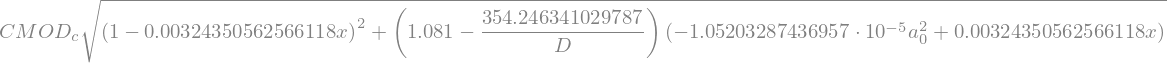

In [15]:
w_x = CMOD_c * sp.sqrt((1 - x/a_c)**2 + (1.081 - 1.149*(a_c/D))*(x/a_c - (a_0/a_c)**2))
w_x

In [16]:
wx_ = w_x.subs(params)
wx = sp.simplify(wx_)
wx

In [17]:
get_w_x = sp.lambdify((x), wx, 'numpy')
get_w_x

<function _lambdifygenerated(x)>

<IPython.core.display.Javascript object>


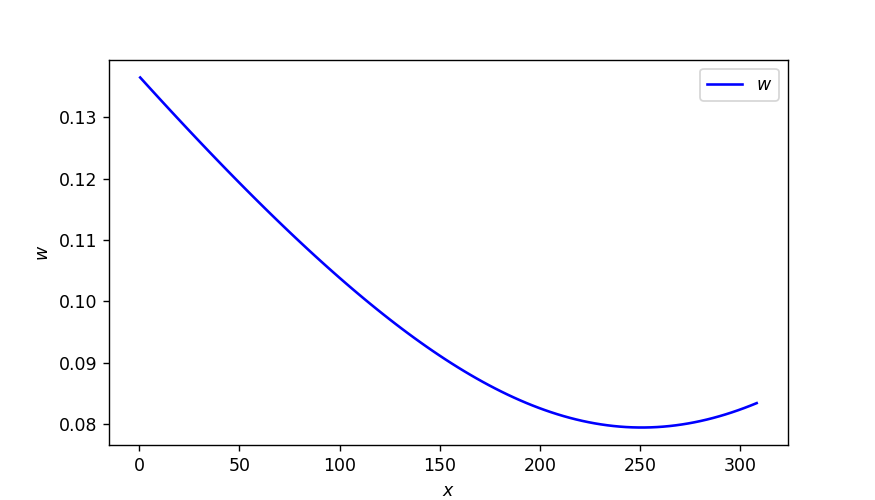

In [18]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.46, 308.30, 100)
w_x_rec = get_w_x(x_range) 
ax1.plot(x_range, w_x_rec, color='b', label = '$w$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$w$')
ax1.legend()

In [19]:
w_x_rec

array([0.13646411, 0.13534583, 0.13423239, 0.1331239 , 0.13202048,
       0.13092227, 0.12982939, 0.12874199, 0.12766019, 0.12658416,
       0.12551403, 0.12444995, 0.12339209, 0.1223406 , 0.12129566,
       0.12025742, 0.11922607, 0.11820179, 0.11718475, 0.11617516,
       0.11517321, 0.11417909, 0.11319302, 0.11221521, 0.11124588,
       0.11028524, 0.10933353, 0.10839098, 0.10745784, 0.10653434,
       0.10562076, 0.10471733, 0.10382434, 0.10294204, 0.10207072,
       0.10121067, 0.10036216, 0.0995255 , 0.09870099, 0.09788894,
       0.09708965, 0.09630344, 0.09553064, 0.09477158, 0.09402659,
       0.093296  , 0.09258016, 0.09187941, 0.09119411, 0.09052459,
       0.08987121, 0.08923433, 0.0886143 , 0.08801148, 0.08742623,
       0.0868589 , 0.08630984, 0.08577941, 0.08526795, 0.0847758 ,
       0.08430331, 0.0838508 , 0.08341861, 0.08300704, 0.08261641,
       0.08224702, 0.08189915, 0.08157307, 0.08126906, 0.08098735,
       0.08072819, 0.08049179, 0.08027835, 0.08008805, 0.07992

In [20]:
w_1 = CTOD_
w_1

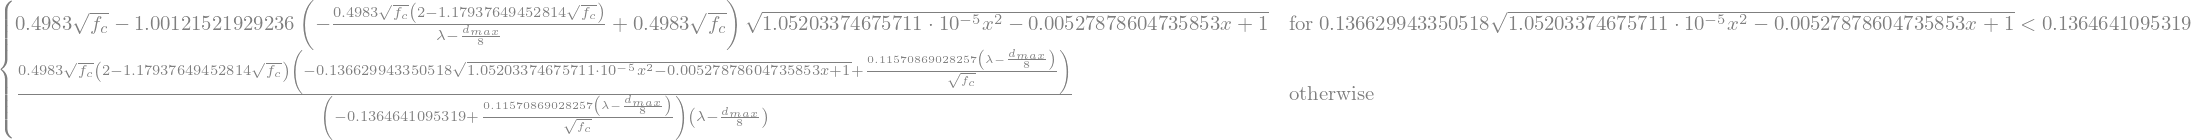

In [21]:
sigma_1 = f_t - (f_t - sigma_s) * (wx / w_1) 
sigma_2 = sigma_s * (w_2 - wx) / (w_2 - w_1)
sigma = sp.Piecewise(
    (sigma_1, wx< w_1),
    (sigma_2, True)
)
sigma

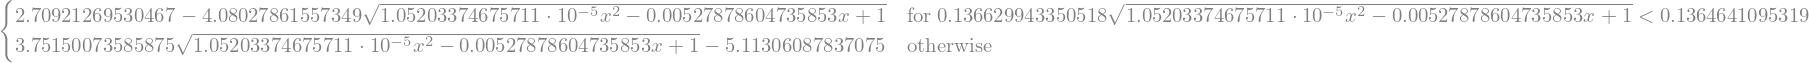

In [22]:
get_sigma = sp.lambdify((x), sigma.subs(params) , 'numpy')
sigma.subs(params)

<img src="cracktipzoom.png" width="600"/> 

<IPython.core.display.Javascript object>


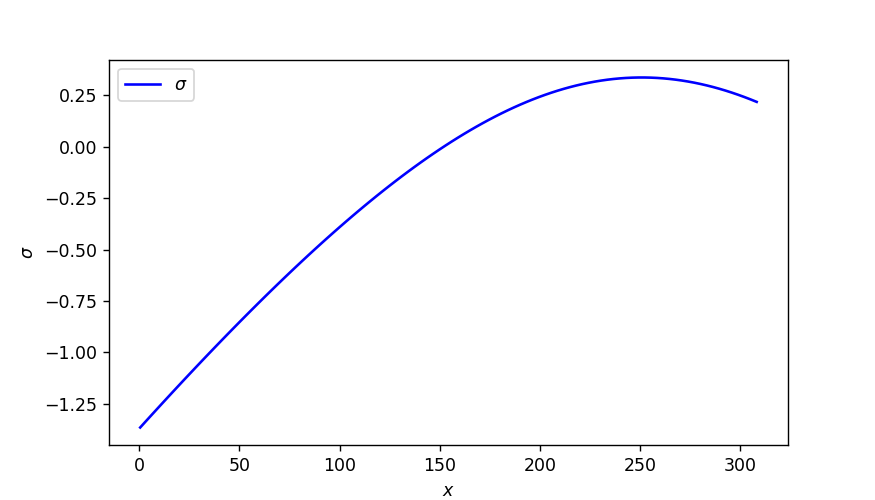

In [23]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.46, 308.30, 100)
sigma_rec = get_sigma(x_range) 
ax1.plot(x_range, sigma_rec, color='b', label = '$\sigma$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$\sigma$')
ax1.legend()

In [24]:
sigma_rec

array([-1.36611351, -1.33271765, -1.29946604, -1.2663623 , -1.23341015,
       -1.20061343, -1.16797607, -1.13550214, -1.10319582, -1.07106139,
       -1.03910329, -1.00732606, -0.97573437, -0.94433305, -0.91312704,
       -0.88212144, -0.85132148, -0.82073254, -0.79036015, -0.76021002,
       -0.73028796, -0.70060001, -0.67115231, -0.6419512 , -0.6130032 ,
       -0.58431496, -0.55589334, -0.52774537, -0.49987823, -0.47229932,
       -0.44501618, -0.41803657, -0.39136841, -0.3650198 , -0.33899902,
       -0.31331455, -0.28797503, -0.26298929, -0.23836631, -0.21411527,
       -0.1902455 , -0.1667665 , -0.1436879 , -0.12101951, -0.09877126,
       -0.07695321, -0.05557556, -0.03464859, -0.01418269,  0.00581167,
        0.02532394,  0.04434354,  0.06285985,  0.08086222,  0.09834003,
        0.11528267,  0.1316796 ,  0.14752032,  0.16279447,  0.17749178,
        0.19160216,  0.20511568,  0.21802262,  0.23031352,  0.24197917,
        0.25301066,  0.26339941,  0.27313719,  0.28221617,  0.29

### Determining Cohesive Breaking Energy
$G_{I-cohesive}$ is defined as the average energy dissipation per unit length due to bridging cohesive action:
\begin{gather*}
G_{I-cohesive} = \frac{1}{a - a_0} \int_{a_0}^{a} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 
especially when crack length $a$ reaches critical effective crack propagation length $a_c$, $G_{I-cohesive}$ becomes critical cohesive crack breaking energy $G^c_{Ic}$ and is given as:
\begin{gather*}
G_{Ic} = \frac{1}{a_c - a_0} \int_{a_0}^{a_c} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 

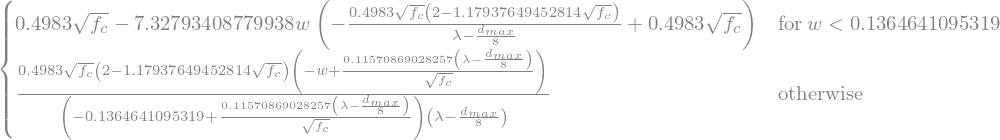

In [25]:
w = sp.Symbol('w', nonnegative = True)
sigma_1_ = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_2_ = sigma_s * (w_2 - w) / (w_2 - w_1)
sigma_ = sp.Piecewise(
    (sigma_1_, w< w_1),
    (sigma_2_, True)
)
sigma_

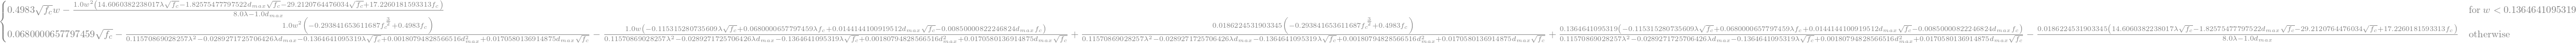

In [26]:
#from sympy.holonomic import expr_to_holonomic
#g = expr_to_holonomic(sigma(x)).integrate(x).to_expr()
g = sp.integrate(sigma_, (w)) #_.subs(params) , 0.46, 308.30
g

In [27]:
get_g = sp.lambdify((w), g.subs(params), 'numpy')
get_g

<function _lambdifygenerated(w)>

<img src="gfdistribution.png" width="600"/> 

<IPython.core.display.Javascript object>


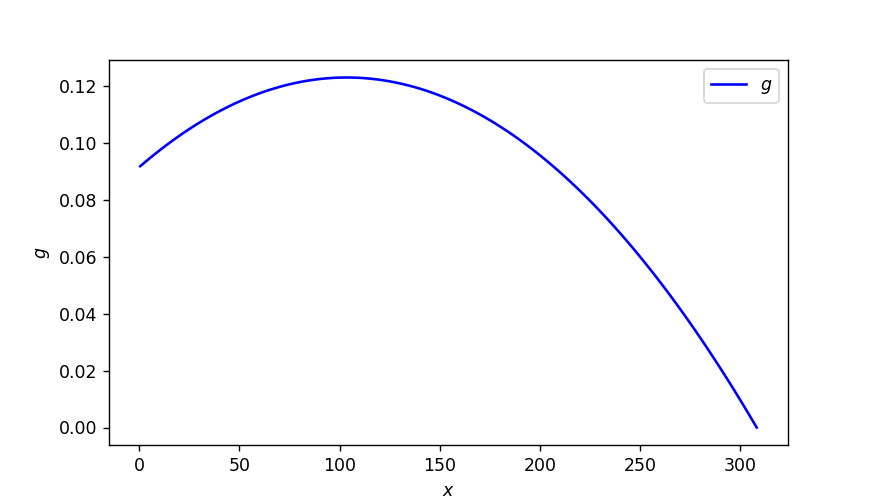

In [28]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
w_range = np.linspace(0.1364, 0, 100)
g_rec = get_g(w_range) 
ax1.plot(x_range, g_rec, color='b', label = '$g$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$g$')
ax1.legend()

In [29]:
g_rec

array([0.09172994, 0.09358116, 0.09537568, 0.09711352, 0.09879467,
       0.10041913, 0.1019869 , 0.10349799, 0.10495238, 0.10635008,
       0.10769109, 0.10897542, 0.11020305, 0.111374  , 0.11248825,
       0.11354582, 0.11454669, 0.11549088, 0.11637838, 0.11720919,
       0.11798331, 0.11870074, 0.11936148, 0.11996553, 0.12051289,
       0.12100356, 0.12143754, 0.12181483, 0.12213543, 0.12239935,
       0.12260657, 0.12275711, 0.12285095, 0.12288811, 0.12286857,
       0.12279235, 0.12265944, 0.12246984, 0.12222354, 0.12192056,
       0.12156089, 0.12114453, 0.12067148, 0.12014175, 0.11955532,
       0.1189122 , 0.11821239, 0.1174559 , 0.11664271, 0.11577283,
       0.11484627, 0.11386301, 0.11282307, 0.11172644, 0.11057311,
       0.1093631 , 0.1080964 , 0.10677301, 0.10539293, 0.10395616,
       0.1024627 , 0.10091255, 0.09930571, 0.09764218, 0.09592197,
       0.09414506, 0.09231146, 0.09042118, 0.0884742 , 0.08647054,
       0.08441018, 0.08229314, 0.08011941, 0.07788898, 0.07560

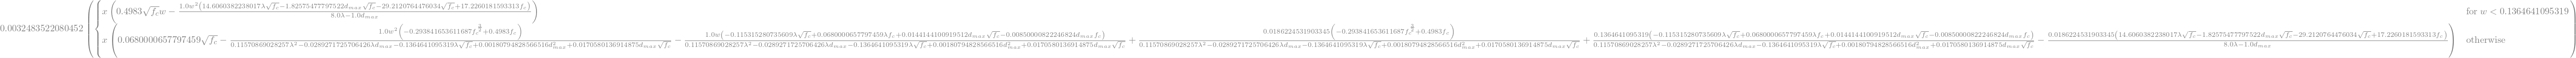

In [30]:
G_c_Ic = 1/(a_c.subs(params) - a_0.subs(params)) * sp.integrate(sp.integrate(sigma_, (w)), (x))
G_c_Ic

In [31]:
get_G_c_Ic = sp.lambdify((x,w), G_c_Ic.subs(params), 'numpy')
get_G_c_Ic 

<function _lambdifygenerated(x, w)>

<IPython.core.display.Javascript object>


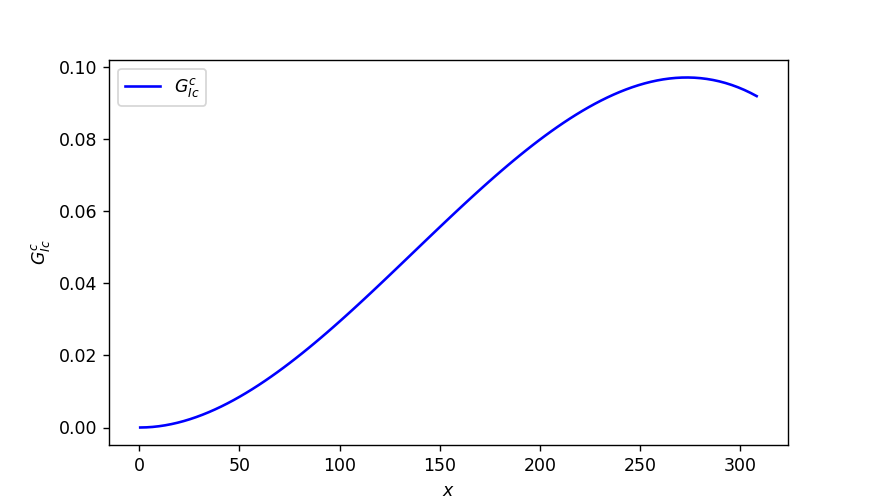

In [32]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
w_range = np.linspace(0, 0.1364, 100)
x_range = np.linspace(0.46, 308.30, 100)
G_c_Ic_ = get_G_c_Ic(x_range, w_range) 
ax1.plot(x_range, G_c_Ic_, color='b', label = '$G^{c}_{Ic}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G^{c}_{Ic}$')
ax1.legend()

### Unstable Fracture Energy
The unstable fracture energy can be obtained as:
\begin{gather*}
G^{un}_{Ic} = \frac{3 P^2_{max}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
\begin{gather*}
V(\alpha) = \left( \frac{\alpha}{1 - \alpha} \right)^2 [5.58 - 19.57 \alpha + 36.82 \alpha^2 - 34.94 \alpha^3 + 12.77 \alpha^4]
\end{gather*}
\begin{gather*}
\alpha = \frac{(a + H_0)}{(D + H_0)}
\end{gather*}

In [33]:
alpha = sp.Symbol(r'\alpha', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
V_alpha = (alpha / (1 - alpha))**2 * (5.58 - 19.57* alpha + 36.82 * alpha**2 - 34.94 * alpha**3 + 12.77 * alpha**4)
C_diff = (3 * S**2) / (2 * B * D**2 * E) * V_alpha.diff(alpha) 
alpha_ = (a + H_0) / (D + H_0)
G = (P**2 / (2*B)) * C_diff 
G_un_Ic = G.subs(P, P_max)
G_un = G_un_Ic.subs(alpha, alpha_).subs(params).subs(a, a_c)
G_un

In [34]:
#alpha = sp.Symbol(r'\alpha', nonnegative = True)
#P = sp.Symbol('P', nonnegative = True)
#a = sp.Symbol('a', nonnegative = True)
#V_alpha = (alpha / (1 - alpha))**2 * (5.58 - 19.57* alpha + 36.82 * alpha**2 - 34.94 * alpha**3 + 12.77 * alpha**4)
#G_un = sp.simplify((3*P_max**2)/(4*B**2*D**3*E) * V_alpha.diff(alpha))
#G_un_ = sp.simplify((3*P_max**2  * S**2)/(4*B**2*D**2*E) * V_alpha.diff(alpha))
#alpha_ = (a + H_0) / (D + H_0)
#alpha_
#G_un_f = G_un_.subs(alpha,alpha_).subs(params).subs(a,a_c)
#G_un_f

In [35]:
#alpha_.subs(params).subs(a, a_c)

In [36]:
#get_G_un = sp.lambdify((x), G_un_f, 'numpy')
#get_G_un

In [37]:
#V = sp.simplify(V_alpha.diff(alpha))
#V.subs(alpha, alpha_.subs(params).subs(a, a_c))

In [38]:
#fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
#x_range = np.linspace(0.46, 308.30, 100) 
#ax1.plot(x_range, G_un, color='b', label = '$G_{un}$')
#ax1.set_xlabel('$x$'); ax1.set_ylabel('$G_{un}$')
#ax1.legend()

### Initial Fracture Energy
\begin{gather*}
G^{ini}_{Ic} = \frac{3 P^2_{ini}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
or, 
\begin{gather*}
G^{ini}_{Ic} = G^{un}_{Ic}  - G^{c}_{Ic}
\end{gather*}

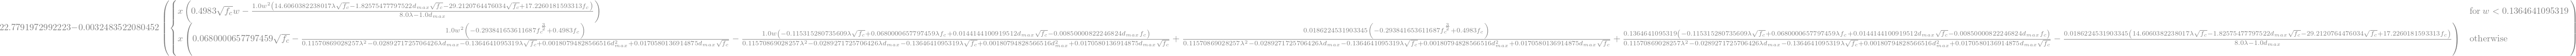

In [39]:
G_ini = G_un - G_c_Ic
G_ini

In [40]:
get_G_ini = sp.lambdify((x, w), G_ini.subs(params), 'numpy')
get_G_ini

<function _lambdifygenerated(x, w)>

<IPython.core.display.Javascript object>


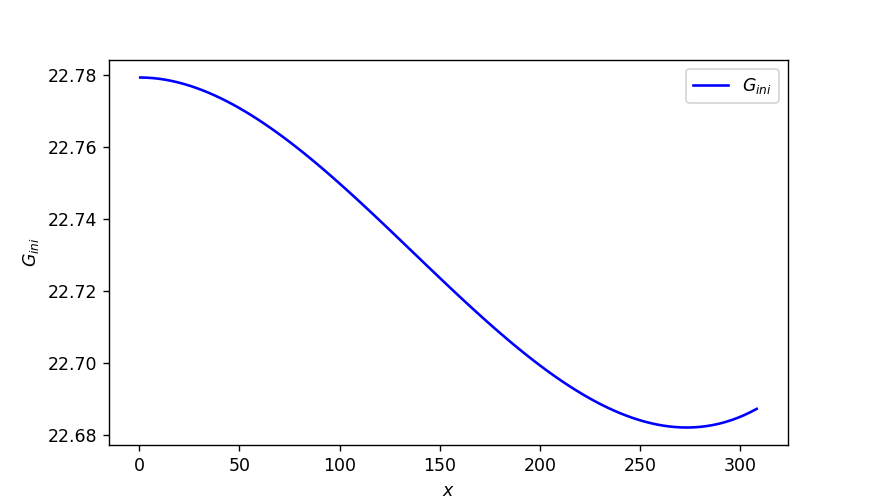

In [41]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
w_range = np.linspace(0, 0.1364, 100)
x_range = np.linspace(0.46, 308.30, 100)
G_ini_ = get_G_ini(x_range, w_range) 
ax1.plot(x_range, G_ini_, color='b', label = '$G_{ini}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G_{ini}$')
ax1.legend()

<IPython.core.display.Javascript object>


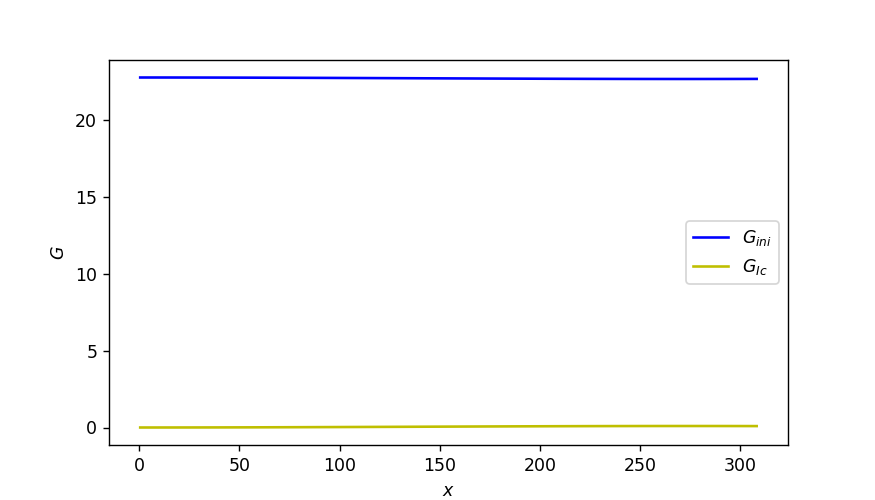

In [42]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
w_range = np.linspace(0, 0.1364, 100)
x_range = np.linspace(0.46, 308.30, 100)
G_ini_ = get_G_ini(x_range, w_range) 
G_I_c_ = get_G_c_Ic(x_range, w_range)  
ax1.plot(x_range, G_ini_, color='b', label = '$G_{ini}$')
ax1.plot(x_range, G_I_c_, color='y', label = '$G_{Ic}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G$')
ax1.legend()